In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (30, 8)

In [2]:
import cv2 as cv
import numpy as np

In [43]:
# backSub = cv.createBackgroundSubtractorMOG2(detectShadows=False) # 200 fps
backSub = cv.createBackgroundSubtractorMOG2(detectShadows=True) # 160 fps
# backSub = cv.createBackgroundSubtractorKNN()

In [44]:
capture = cv.VideoCapture('./vtest.avi')

In [45]:
_, frame = capture.read()

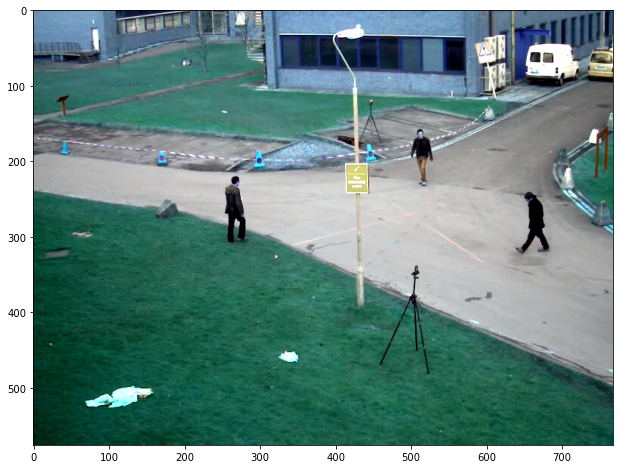

In [46]:
plt.imshow(frame);

In [47]:
%%time
frames = []

while True:
    ret, frame = capture.read()
    if frame is None:
        break

    fgMask = backSub.apply(frame)
    frames.append(fgMask)

Wall time: 6.76 s


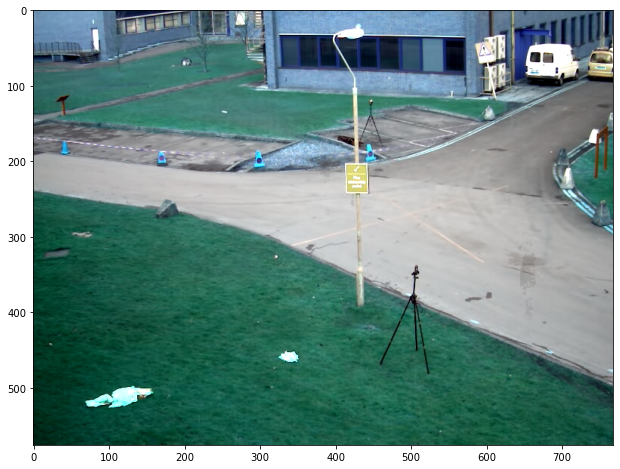

In [56]:
bg = backSub.getBackgroundImage()
plt.imshow(bg);

In [48]:
len(frames)

794

In [49]:
frame = frames[200]

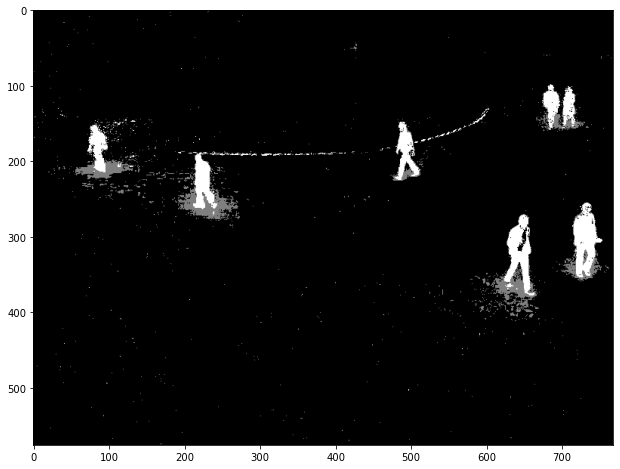

In [50]:
plt.imshow(frame, cmap='gray');

In [51]:
np.unique(frame, return_counts=True)

(array([  0, 127, 255], dtype=uint8),
 array([425999,   7453,   8916], dtype=int64))

In [52]:
shadow_grayscale = 127

In [53]:
no_shaow_frame = frame.copy()
no_shaow_frame[frame == shadow_grayscale] = 0

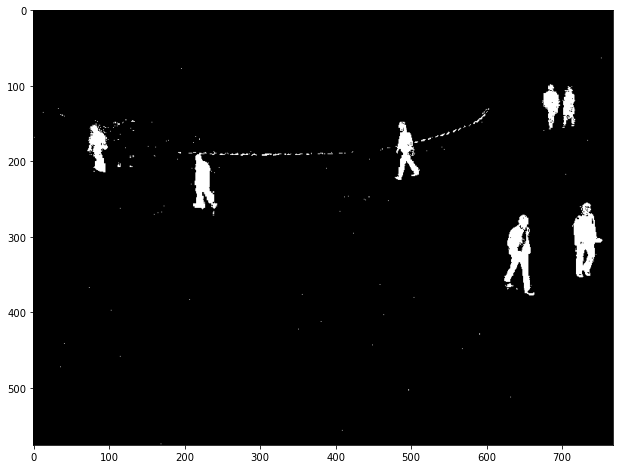

In [54]:
plt.imshow(no_shaow_frame, cmap='gray');

In [55]:
cv.imwrite('./people.jpg', no_shaow_frame) 

True